# How is a Machine learning Project Done??
## 6 Steps
1. Looking at big images
2. Get the data
3. Discovering and visualizing the data to gain the insights
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.

## Looking at Big Images
We are now going to build a machine learning model of housing prices in California using the California census data. This data has features such as the population, median income, median housing price, and so on for each block in California.
Our model should learn from the data and be able to predict the median housing price in any block, when given all the other features.
### Frame the Problem
The first question to ask ourselves is: what exactly is the business objective. what does the company expect us to do and benefit from this model? This is important because it will determine how we frame the problem, what algorithms we will select, what performance measure we will use to evaluate our model, and how much effort we should spend tweaking it. We found that our model's output will be fed to another Machine Learning system, along with many other signals. This downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.
The next question to ask is what the current solution looks like (if any). It will often give us a reference performance, as well as insights on how to solve the problem. We found that the district housing prices are currently estimated manually by experts, We know that it is costly and time-consuming, and their estimations are not great. This is why the company thinks that it would be useful to train a model to predict a district's median housing price given other data about that district.
Okay, with all this information we are now ready to start designing our system. First, we need to frame the problem: is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Should you use batch learning or online learning techniques?
Let's see: it is clearly a typical supervised learning task since we are given labeled training examples. Moreover, it is also a typical regression task, since we are asked to predict a value. Finally, there is no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.
### Select a Performance Measure
A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors.
The mathematical formula to compute the RMSE:

<img src = "images/blog15-RMSE.jpg">

## Get the Data

You can download the dataset from the following link: 

https://github.com/varshitha-g/Boston-house-price-predcition-

### Loading the data

In [1]:
import pandas as pd
path = "datasets/housing.csv"
housing = pd.read_csv(path)
housing.head() # head is used to look at the top five rows of the dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute's type and number of non-null values.

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset. Notice that the total_bed rooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later.

All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of Python object, but since we loaded this data from a CSV file we know that it must be a text attribute. When we looked at the top five rows, we probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. We can find out what categories exist and how many districts belong to each category by using the value_counts() method:

In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let's look at the other fields. The describe() method shows a summary of the numerical attributes.

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored. The std row shows the standard deviation. The 25%, 50%, and 75% rows show the corresponding percentiles. These are often called the 1st quartile, the median, and the 3rd quartile respectively.

Another way to get a feel of data we are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances that have a given value range. We can either plot this one attribute at a time, or we can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute.

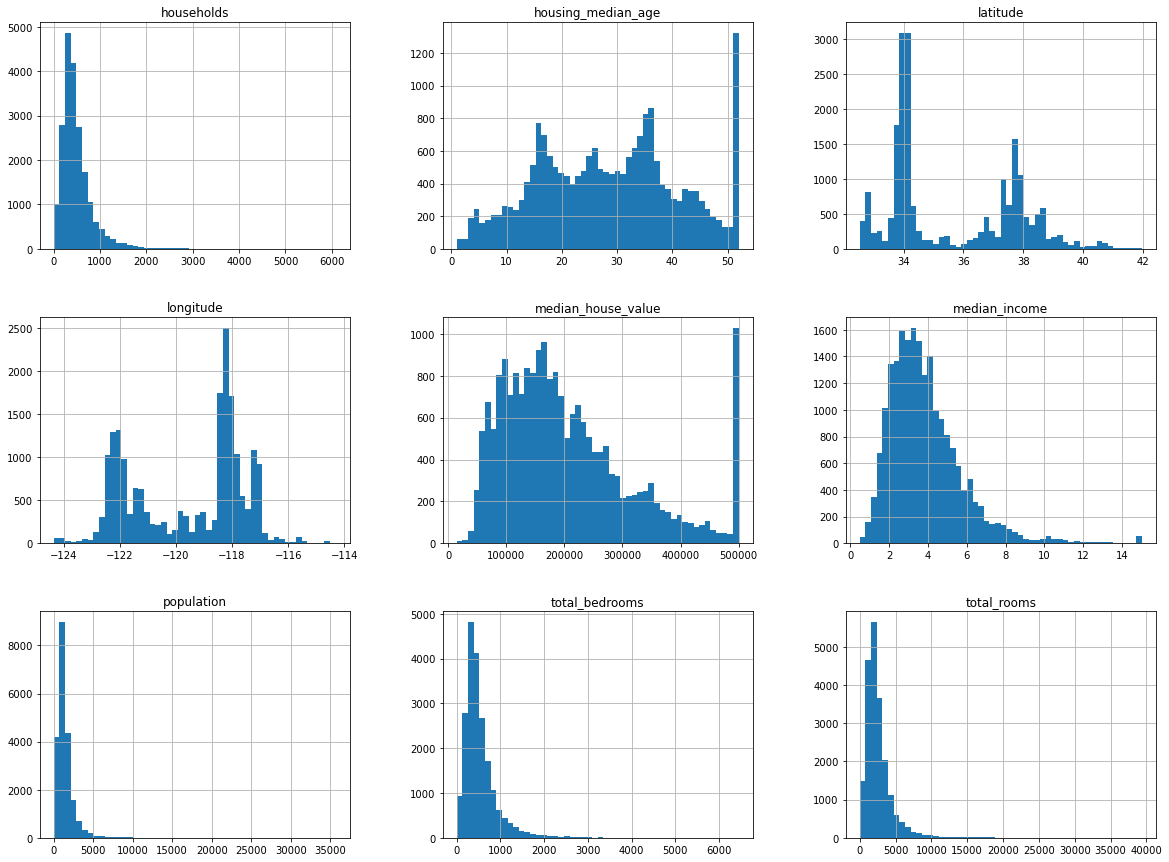

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Create a Test Set

Creating a test set is simple, just pick some instances randomly, typically 20% of the dataset, and set them aside.

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [7]:
len(train_set)

16512

In [8]:
len(test_set)

4128

## Discover and Visualize the Data to Gain Insights

In [9]:
housing = train_set.copy() #making the copy of the training dataset

### Visualizing Geographical Data

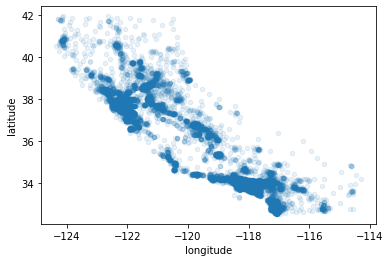

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now let’s look at the housing prices. The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

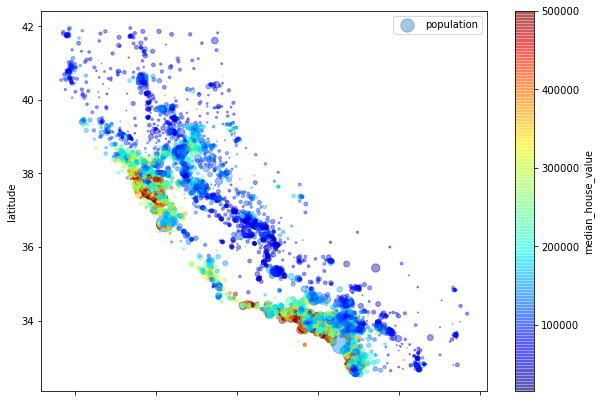

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()

This image tells us that the housing prices are very much related to the location and to the population density.

### Looking for Correlations

Since the dataset is not too large, we can easily compute the standard correlation coefficient between every pair of attributes using the corr() method:

In [12]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation. When the coefficient is close to –1, it means that there is a strong negative correlation. When, coefficients close to zero mean that there is no linear correlation.

Another way to check for correlation between attributes is to use Pandas scatter_matrix function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, we would get 121 plots, which would not fit, so let’s just focus on a few promising attributes that seem most correlated with the median housing value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2E6333370>,
      dtype=object)

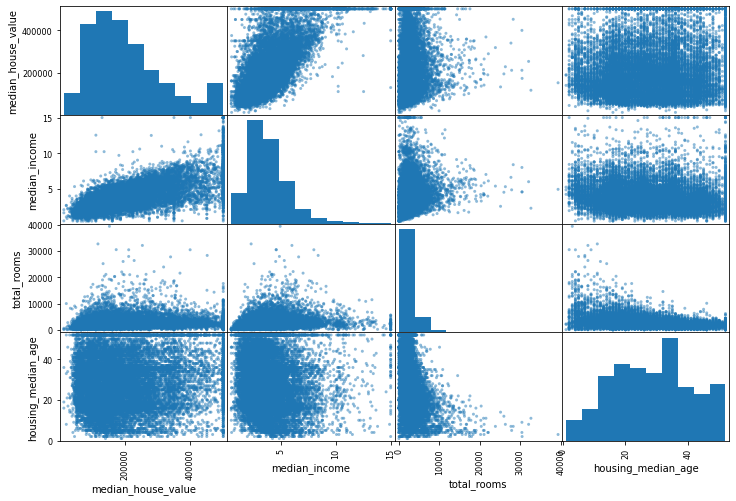

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

### Experimenting with Attribute Combinations

One last thing we may want to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if we don’t know how many households there are. What we really want is the number of rooms per household. Let’s create some new attributes similarly:

In [14]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

And now let’s look at the correlation matrix again:

In [15]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

## Prepare the Data for Machine Learning Algorithms

It’s time to prepare the data for your Machine Learning algorithms.

let’s separate the predictors and the labels.

In [16]:
housing_features = housing.drop('median_house_value', axis=1) #Generally taken as X
housing_labels = housing['median_house_value'].copy() #Generally taken as Y
housing_labels.to_frame()
housing_labels.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

### Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s take care of them. We noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this. We have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.)

We can do these easily using DataFrame’s dropna(), drop(), and fillna() methods, respectively.

We will do it using option 3, So we should compute the median value on the training set, and use it to fill the missing values in the training set, and also we need to save the median value that we have computed. we will need it later to replace missing values in the test set when we want to evaluate our model, and also once the model goes live to replace missing values in new data.

In [17]:
median = housing_features["total_bedrooms"].median() # option 3
housing_features["total_bedrooms"].fillna(median, inplace=True)

In [18]:
housing_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,6.268421,0.180940,2.300000


### Handling Text and Categorical Attributes

In [19]:
housing_cat = housing_features[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND


We can see that the 'ocean_proximity' column contains the catogerical attributes.

Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [21]:
housing_features['ocean_proximity'] = housing_cat_encoded
housing_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4.0,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.0,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4.0,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.0,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1.0,6.268421,0.180940,2.300000


### Feature Scaling

One of the most important transformations we need to apply to our data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is true for the housing data: the total number of rooms ranges from about 6 to 39,320, while the medianincomes only range from 0 to 15. Note that scaling the target values is generally notrequired.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization

 We will be using standardization for now:
 

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

housing_features = sc.fit_transform(housing_features)
housing_features = pd.DataFrame(housing_features)
housing_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,2.005932,-0.174916,-0.211785,0.051376
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,2.005932,-0.402835,0.342185,-0.117362
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,2.005932,0.088216,-0.661658,-0.032280
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,2.005932,-0.600015,0.783032,0.077507
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,-0.112427,0.349007,-0.550364,-0.068832


## Select and Train a Model

At last! We framed the problem, we got the data and explored it, we sampled a training set and a test set, and we cleaned up and prepare our data for Machine Learning algorithms automatically. We are now ready to select and train a Machine Learning model.

### Training and Evaluating on the Training Set

Let’s first train a Linear Regression model

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_features, housing_labels)

LinearRegression()

Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np 
housing_predictions = lin_reg.predict(housing_features)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68310.33842917712

Okay, this is clearly not a great score. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. As we know, the main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, so this rules out the last option. we could try to add more features, but first let’s try a more complex model to see how it does.

Let’s train a DecisionTreeRegressor.

In [25]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_features, housing_labels)

DecisionTreeRegressor()

In [26]:
housing_predictions = tree_reg.predict(housing_features)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Wait, what??? Could this model really be absolutely perfect? The model have badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training, and part for model validation.

### Better Evaluation Using Cross-Validation

We use Scikit-Learn’s K-fold cross-validation feature. The following validation randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_features, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [29]:
print("Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Scores: [70422.61996993 73849.0991684  67686.79462413 70029.5117545
 75253.7161747  68718.06476023 71147.95391215 70556.39720269
 69691.34356102 71268.55494513]
Mean: 70862.40560728774
Standard deviation: 2132.728202746294


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model.

Let’s compute the same scores for the Linear Regression model:

In [30]:
lin_scores = cross_val_score(lin_reg, housing_features, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [31]:
print("Scores:", lin_rmse_scores)
print("Mean:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

Scores: [65519.75928453 71815.13693991 67678.05660866 66634.66292406
 69210.01955272 66066.52957522 65704.930784   69373.75591309
 73704.33824339 69727.73073113]
Mean: 68543.49205567203
Standard deviation: 2600.0452323011814


That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

Let’s try one last model now: the RandomForestRegressor.

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_features, housing_labels)
housing_predictions = forest_reg.predict(housing_features)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18762.10707345352

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, housing_features, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [34]:
print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

Scores: [48573.29153846 51537.59957243 49958.7076371  52341.21724973
 52324.84517092 48413.59950578 48644.03320658 51173.39772463
 50060.3040098  51055.85982987]
Mean: 50408.285544528684
Standard deviation: 1430.7794451302261


Wow, this is much better: Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set.

## Fine-Tune Your Model
Let’s assume that we now have a shortlist of promising models. You now need to fine-tune them. Let’s look at a few ways we can do that.

### Grid Search

One way to do that would be to fiddle with the hyperparameters manually, until we find a great combination of hyperparameter values, which is pratically impossible. Instead we should get Scikit-Learn’s GridSearchCV to search for us.

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_features, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

we can get the best combination of parameters like this:

In [36]:
 grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

You can also get the best estimator directly

In [37]:
 grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

## Evaluate Our System on the Test Set

After tweaking our models for a while, we eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

In [38]:
final_model = grid_search.best_estimator_

In [39]:
test_set["rooms_per_household"] = test_set["total_rooms"]/test_set["households"]
test_set["bedrooms_per_room"] = test_set["total_bedrooms"]/test_set["total_rooms"]
test_set["population_per_household"]=test_set["population"]/test_set["households"]

In [40]:
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()
y_test.to_frame()
y_test.head()

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64

In [41]:
X_test.fillna(median, inplace=True)

In [42]:
X_test_cat = X_test[["ocean_proximity"]]

In [43]:
X_test_catt_encoded = ordinal_encoder.fit_transform(X_test_cat)

In [44]:
X_test['ocean_proximity'] = X_test_catt_encoded

In [45]:
X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [47]:
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

66637.43339196402